/work/Walmart_analysis
  0%|                                               | 0.00/3.36M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 3.36M/3.36M [00:00<00:00, 123MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     object
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 no

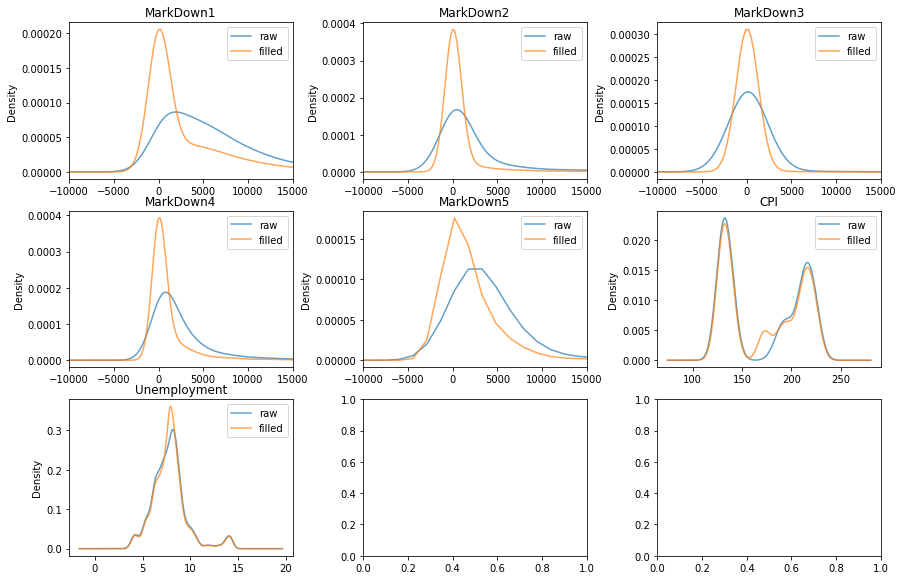

In [ ]:
%run 0.0-thomas-data_processing.ipynb

# data exploration

In [ ]:
df_filled.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.460809,7.826821,130287.600000
std,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,38.292649,1.808963,63115.971429
min,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,34875.000000
25%,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000,70713.000000
50%,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.460809,7.826821,126512.000000
75%,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,202307.000000
max,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


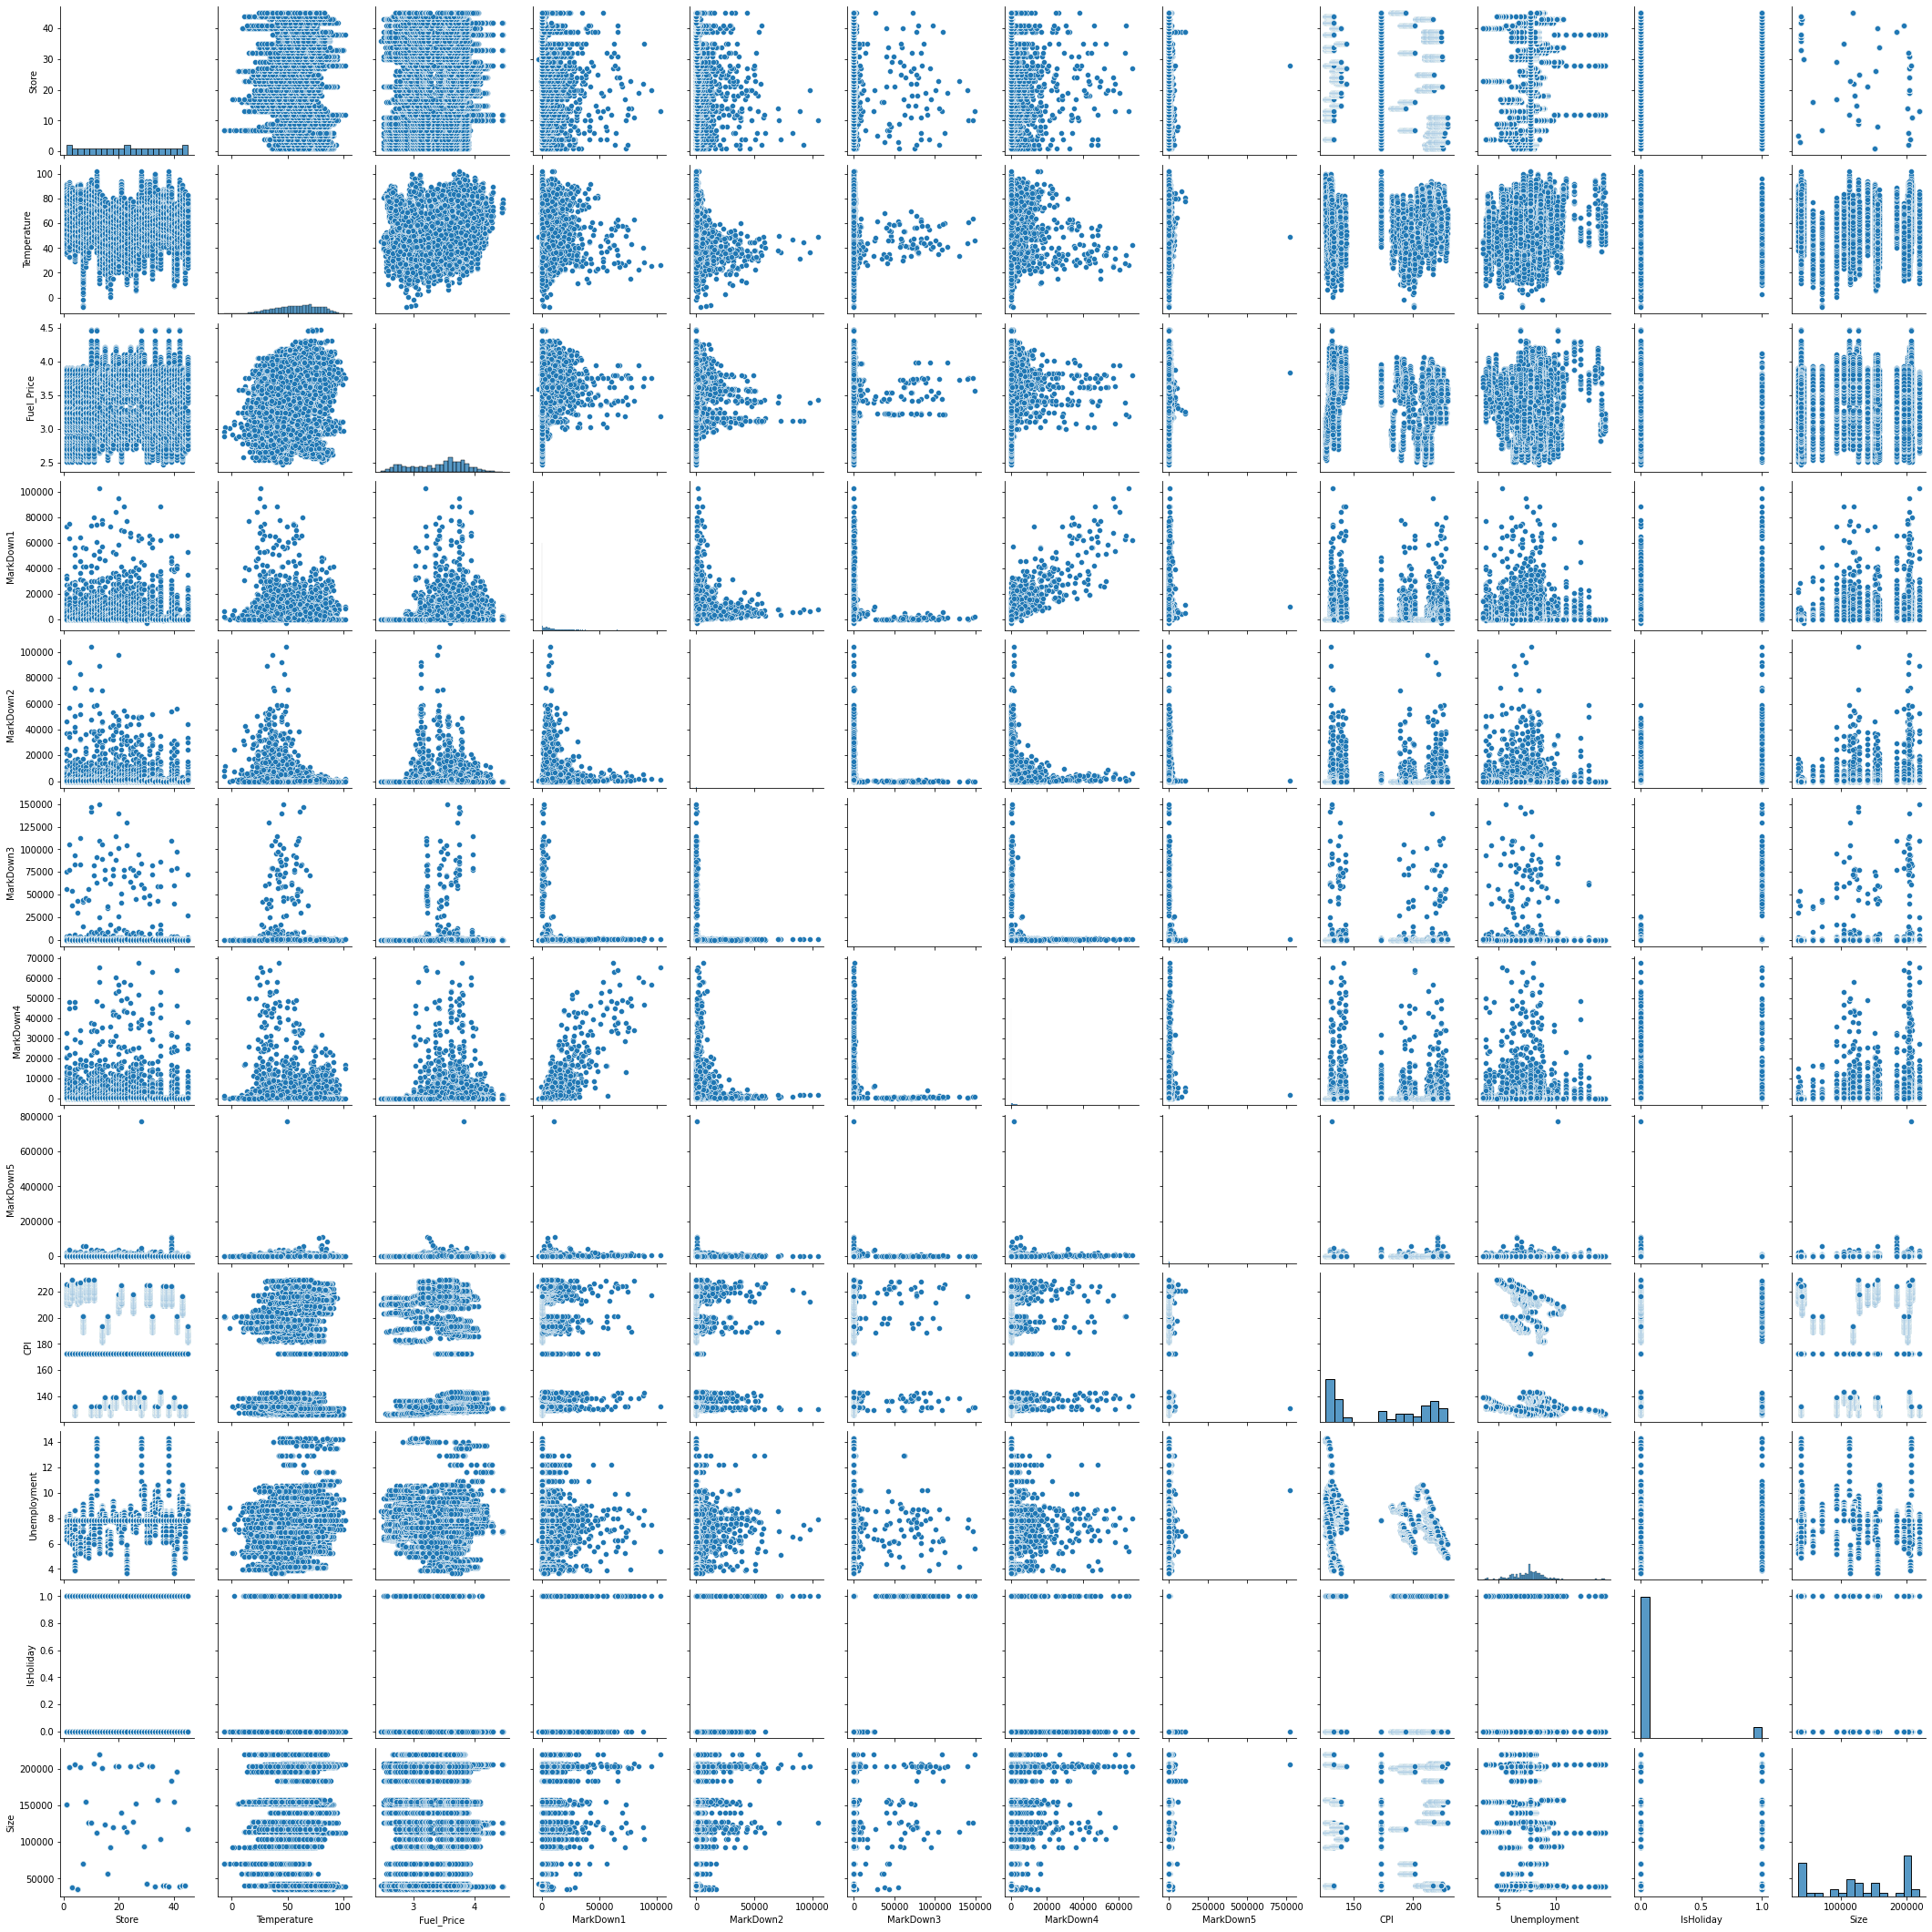

In [ ]:
sns.pairplot(df_filled)

<AxesSubplot:>

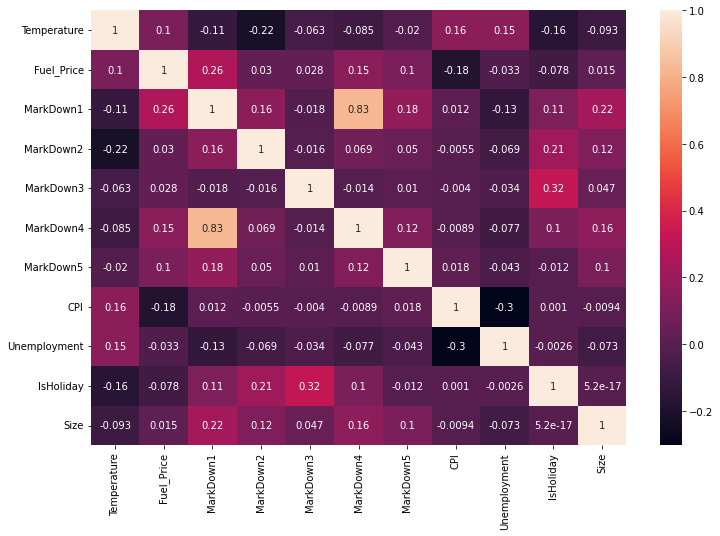

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_filled.corr(),annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=740c3fbb-6503-48b5-8790-fc69ebaa42e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>